# CIFAR-10 CNN Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pickle
import csv,sys

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, preprocessing

/Users/alexmiller/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Config for notebook

In [2]:
config = {'model_save_path': '/Users/alexmiller/Documents/cifar-10/cifar-10-cnn-model-dropout',
          'checkpoint_path': 'cifar-10-cnn/cp.ckpt',
          'class_names_list': ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 
                               'horse', 'ship', 'truck'],
          'optimizer': 'adam',
          'loss': 'sparse_categorical_crossentropy',
          'metrics': 'sparse_categorical_accuracy',
          'epochs': 10,
          'batch_size': 64
          }

## Functions

In [3]:
def plot_history(r, accuracy_metric):
    plt.plot(r.history[accuracy_metric], label = 'accuracy', color = 'red')
    plt.plot(r.history['val_'+accuracy_metric], label = 'val_acc', color = 'green')
    plt.legend()
    plt.show()

## Load dataset and scale training data

In [4]:
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

print(f"Train data min: {np.min(x_train)} and max: {np.max(x_train)}")
print(f"Test data min: {np.min(x_test)} and max: {np.max(x_test)}")
print(f"Train labels shape: {x_train.shape}")
print(f"Test labels shape: {x_test.shape}")

Train data min: 0.0 and max: 1.0
Test data min: 0.0 and max: 1.0
Train labels shape: (50000, 32, 32, 3)
Test labels shape: (10000, 32, 32, 3)


## Visualize images

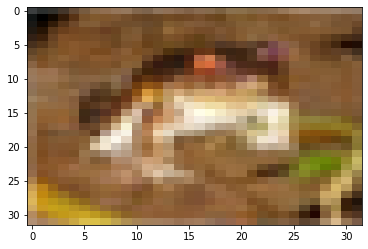

In [6]:
plt.imshow(x_train[0], aspect = 'auto')

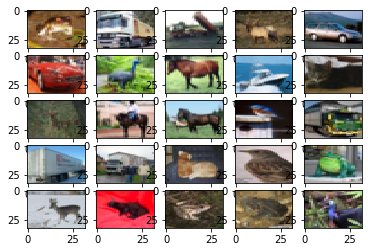

In [7]:
rows = 5
cols = 5
k = 0

fig, ax = plt.subplots(nrows = rows, ncols = cols)

for i in range(rows):
    for j in range(cols):
        image = np.reshape(x_train[k], (32, 32, 3))
        ax[i][j].imshow(image, aspect = 'auto')
        k += 1

plt.show()

## CNN Model 1

In [8]:
K = len(np.unique(x_train))
print("Number of classes:", K)

# Build model
model = models.Sequential([
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu',
                  input_shape = [x_train.shape[1], x_train.shape[2], x_train.shape[3]]),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(2, 2, padding = 'valid'),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(2, 2, padding = 'valid'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(K, activation = 'softmax')
])

# Print model summary
model.summary()

Number of classes: 256
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (Non

In [9]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

In [ ]:
# Fit model
r = model.fit(x_train, y_train, 
              validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 132s 84ms/step - loss: 1.5392 - sparse_categorical_accuracy: 0.4453 - val_loss: 1.1460 - val_sparse_categorical_accuracy: 0.5919
Epoch 2/10
1563/1563 [==============================] - 148s 95ms/step - loss: 1.0995 - sparse_categorical_accuracy: 0.6124 - val_loss: 0.9581 - val_sparse_categorical_accuracy: 0.6694
Epoch 3/10
1563/1563 [==============================] - 143s 91ms/step - loss: 0.9432 - sparse_categorical_accuracy: 0.6700 - val_loss: 0.8674 - val_sparse_categorical_accuracy: 0.6967
Epoch 4/10
1563/1563 [==============================] - 141s 90ms/step - loss: 0.8491 - sparse_categorical_accuracy: 0.7049 - val_loss: 0.7731 - val_sparse_categorical_accuracy: 0.7307
Epoch 5/10
1563/1563 [==============================] - 141s 91ms/step - loss: 0.7825 - sparse_categorical_accuracy: 0.7278 - val_loss: 0.8069 - val_sparse_categorical_accuracy: 0.7169
Epoch 6/10
 552/1563 [=========>....................] - ETA: 1:31 - loss: 0

In [ ]:
# Plot accuracy and validation accuracy by epoch
plot_history(r, 'sparse_categorical_accuracy')

In [ ]:
# Accuracy for test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss} Test accuracy: {test_accuracy}")

In [ ]:
# Predict probability on test set
y_pred = model.predict(x_test)
print(f"Test probability predictions shape: {y_pred.shape}")

# Convert probabilities to labels
y_pred_class = np.argmax(y_pred, axis=-1)
print(f"Test class predictions shape: {y_pred_class.shape}")

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

print(classification_report(y_test, y_pred_class, target_names = class_list))

## CNN Model 2

In [ ]:
K = len(np.unique(x_train))
print("Number of classes:", K)

model2 = models.Sequential([
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu',
                  input_shape = [x_train.shape[1], x_train.shape[2], x_train.shape[3]]),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(2, 2, padding = 'valid'),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(2, 2, padding = 'valid'),
    layers.Dropout(0.2),
    layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
    layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(2, 2, padding = 'valid'),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(K, activation = 'softmax')
])

model2.summary()

In [ ]:
model2.compile(optimizer=config['optimizer'],
               loss=config['loss'],
               metrics=list(config['metrics']))

### Save model checkpoints

In [ ]:
checkpoint_path = config['checkpoint_path']
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
r2 = model2.fit(x_train, 
                y_train,  
                epochs=config['epochs'],
                batch_size = config['batch_size'],
                validation_data=(x_test, y_test),
                callbacks=[cp_callback])  # Pass callback to training

### Plot history of model

In [ ]:
plot_history(r2, config['metrics'])

In [ ]:
# Accuracy on test set
test_loss, test_accuracy = model2.evaluate(x_test, y_test)
print(f"Test loss: {test_loss} Test accuracy: {test_accuracy}")

In [ ]:
y_pred = model.predict(x_test)
print(f"Test probability predictions shape: {y_pred.shape}")
# y_pred_class = model.predict_classes(x_test)
y_pred_class = np.argmax(y_pred, axis=-1)
print(f"Test class predictions shape: {y_pred_class.shape}")

In [ ]:
print(classification_report(y_test, y_pred_class, target_names = class_list))

### Save final model

In [ ]:
model_save_path = config['model_save_path']

model2.save(model_save_path)

loaded_model = tf.keras.models.load_model(model_save_path)

# Check its architecture
loaded_model.summary()

In [ ]:
test_loss, test_acc = loaded_model.evaluate(x_test, y_test)
print(f"Test loss {test_loss} Test accuracy {test_acc}")